In [13]:
import pandas as pd

In [14]:
# Load dataset

ab_data = pd.read_csv('./data/ab_data.csv')
countries = pd.read_csv('./data/countries.csv')

In [15]:
# Explore data

ab_data.info()
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294480 entries, 0 to 294479
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294480 non-null  int64 
 1   timestamp     294480 non-null  object
 2   group         294480 non-null  object
 3   landing_page  294480 non-null  object
 4   converted     294480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290586 entries, 0 to 290585
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290586 non-null  int64 
 1   country  290586 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [16]:
# Check duplications in ab_data
ab_duplicates = ab_data[ab_data.duplicated()]
ab_duplicates

,user_id,timestamp,group,landing_page,converted


In [17]:
# Check duplications in countires

countries_duplicates = countries[countries.duplicated()]
countries_duplicates

,user_id,country
290584,759899,US


In [18]:
# Remove one of the duplicate rows

countries = countries.drop_duplicates(keep='last')
countries[countries.duplicated()]

,user_id,country


In [ ]:
# Check mismatches between group and landing page

mismatches = ab_data[
    ((ab_data['group'] == 'control') & (ab_data['landing_page'] != 'old_page')) |
    ((ab_data['group'] == 'treatment') & (ab_data['landing_page'] != 'new_page'))
]

len(mismatches)

3893

In [20]:
# Remove mismatches
ab_cleaned = ab_data.drop(mismatches.index)

In [21]:
ab_cleaned.shape

(290587, 5)

In [22]:
# Merge with countires data

merged_data = ab_cleaned.merge(countries, on= 'user_id', how='left')
merged_data.shape

(290587, 6)

In [ ]:
# Calculate Conversion Rates
import matplotlib.pyplot as plt

# Calculate conversion rate for each group

conversion_rates = merged_data.groupby(['group', 'landing_page'])['converted'].agg(['mean', 'count', 'sum']).reset_index()
conversion_rates

,group,landing_page,mean,count,sum
0,control,old_page,0.120386,145274,17489
1,treatment,new_page,0.118806,145313,17264


In [24]:
# Plotting conversion rates
control_rate = conversion_rates.loc[conversion_rates['group'] == 'control', 'mean'].values[0]
treatment_rate = conversion_rates.loc[conversion_rates['group'] == 'treatment', 'mean'].values[0]

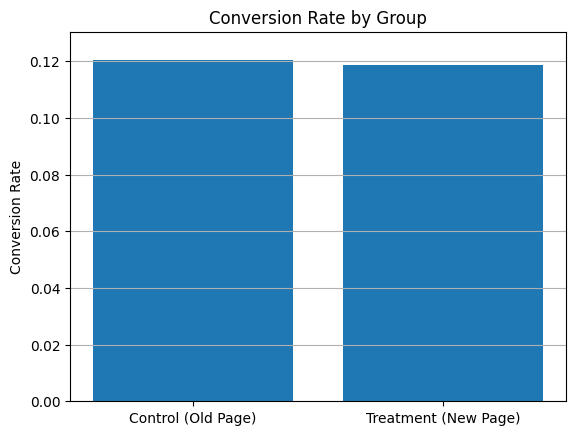

       group landing_page   count    sum      mean
0    control     old_page  145274  17489  0.120386
1  treatment     new_page  145313  17264  0.118806


In [28]:
plt.bar(['Control (Old Page)', 'Treatment (New Page)'], [control_rate, treatment_rate])
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(control_rate, treatment_rate) + 0.01)
plt.grid(axis='y')
plt.show()

print(conversion_rates[['group', 'landing_page', 'count', 'sum', 'mean']])

In [31]:
# Two-Proportion Z-Test

from statsmodels.stats.proportion import proportions_ztest

# Define Conversion and Sample size
successes = [17489, 17264] # control, treatment
nobs = [145274, 145313]     # total users in each group

# Two-proportion z-test
z_stats, p_value = proportions_ztest(successes, nobs)

print(f"Z-statistics: {z_stats}")
print(f"P-value: {p_value}")

Z-statistics: 1.31297418987394
P-value: 0.18919164543294498


In [32]:
# Interpretation

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The difference is statistically significant.")
else:
    print("Fail to reject the null hypothwsis: No significant difference between groups")

Fail to reject the null hypothwsis: No significant difference between groups
